### <span style = 'color:green'> Create a machine learning model that can predict the pulser star </span>


**Support Vector Machines(SVM)**
- Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

**About the dataset**
- Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

**Expected output**
- **Missing values should be treated**
- **Perform Standerdisation and handle outliers**
- **perform Support Vector Mchines and tune the model to increase the efficiency of the model**

- For dataset please click here <a href="https://drive.google.com/file/d/19d2ocdl8d5rrE8Wc8nkBTFu_QrgtDt3q/view?usp=sharing
" title="Google Drive">Click here</a>




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Data Loading 
df = pd.read_csv('SVM.csv')

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [5]:
# lets check columns
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
df.shape

(17898, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     15396 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        16196 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17029 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [8]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       2502
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1702
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     869
target_class                                     5370
dtype: int64

In [9]:
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [10]:
# there are many missing values in data set
# now first lets remove missing rows from target_class because it will not help us in training or testing the data 


df_cleaned = df.dropna(subset=['target_class'])

In [11]:
# Replace missing numerical values with mean of the column
df_filled =df_cleaned.fillna(df.mean())

In [12]:
# now all the missing values are treated lets move forward
df_filled.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [13]:
# lets Perform Standerdisation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = [' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']

df_filled[numerical_features] = scaler.fit_transform(df_filled[numerical_features])

In [14]:
df_filled.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.393989,0.272252,-0.104510,-0.288585,-0.321013,-0.426141,-0.194818,-0.385229,0.0
1,-1.327257,-1.521273,0.236936,0.259381,-0.346990,-0.470521,0.238373,-0.026393,0.0
2,0.761306,0.986368,-0.349479,-0.334344,-0.335385,-0.213812,0.038556,-0.300477,0.0
3,1.766787,0.344739,-0.703051,-0.314056,0.161989,0.001075,-1.185162,-0.938920,0.0
4,-1.022022,-1.529786,0.350391,0.240922,-0.333804,-0.307276,0.015768,-0.278890,0.0


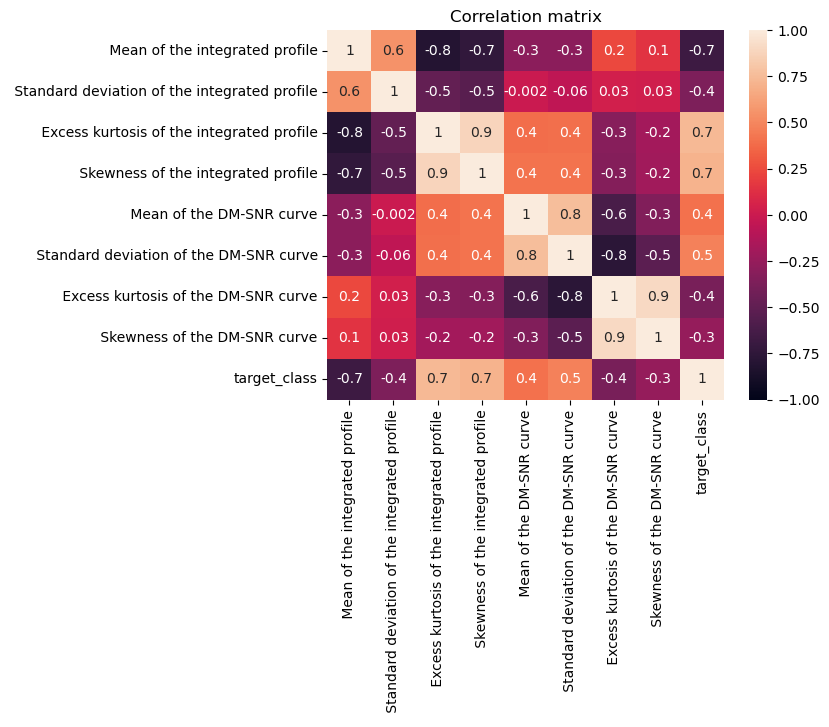

In [15]:
corr = df_filled.corr()
#matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Correlation matrix')
plt.show()

In [16]:
# now lets move forward

In [17]:
X = df_filled.drop('target_class',axis=1)
y = df_filled['target_class']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
print('Train size: ',X_train.shape,y_train.shape)
print('Test size: ',X_test.shape,y_test.shape)

Train size:  (10022, 8) (10022,)
Test size:  (2506, 8) (2506,)


In [19]:
#Fitting SVM to training set
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)  

y_pred = svm.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(0.9796488427773344,
 array([[2276,    9],
        [  42,  179]], dtype=int64))

In [41]:
# now lets try to tune the model
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()


In [43]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [44]:
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1)

In [45]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [46]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [47]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy, cm

(0.9804469273743017,
 array([[2276,    9],
        [  40,  181]], dtype=int64))

In [ ]:
#  we have  tuned the model to increase the efficiency of the model by tuneing the hyperparameters